<a href="https://colab.research.google.com/github/BrauuHdzM/Redes-neuronales-desde-cero/blob/master/RedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

[[0.21767994]
 [0.00757397]
 [0.91401509]]
[[1.52023632e-01]
 [9.41473280e-01]
 [3.72368178e-04]]
[[0.80930285]
 [0.07380506]
 [0.06113623]]
[[0.83050036]
 [0.11442539]
 [0.04666533]]


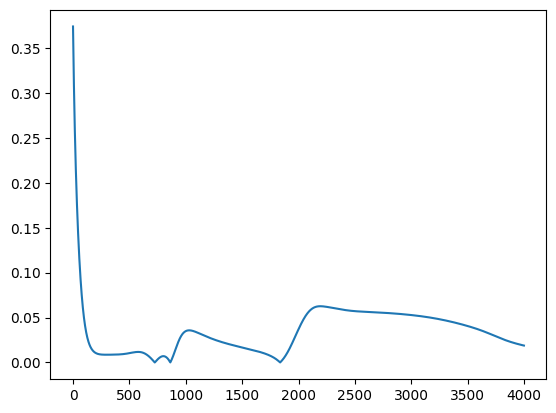

In [ ]:
def sigmoid(x):
  return scipy.special.expit(x)

a=0.1
En= np.array(np.mat('0.99 ; 0.5 ; 0.99'))
En2= np.array(np.mat('0.0 ; 0.5 ; 0.0'))
En3= np.array(np.mat('0.99 ; 0.5 ; 0.0'))

prueba= np.array(np.mat('0.8 ; 0.5 ; 0.0'))


O= np.array (np.mat ('0.0 ; 0.0 ; 1'))
O2= np.array(np.mat('0.0 ; 1 ; 0.0'))
O3= np.array(np.mat('1 ; 0.0 ; 0.0'))

w1= np.random.rand(3,3)
w2= np.random.rand(3,3)
w3 =np.random.rand(3,3)

def entrena(w1,w2,w3,En,O):
  S2=sigmoid(np.dot(w1,En))
  Si=sigmoid(np.dot(w2,S2))
  S=sigmoid(np.dot(w3,Si))

  e=O-S
  ei=np.dot(w3.T,e)
  e2=np.dot(w2.T,ei)

  w3+=a*np.dot(e*S*(1.-S),S2.T) #Actualización de los pesos
  w2+=a*np.dot(ei*Si*(1.-Si),Si.T) #Actualización de los pesos
  w1+=a*np.dot(e2*S2*(1.-S2),En.T) #Actualización de los pesos

  return w1,w2,w3,np.mean(e)

def clasifica(w1,w2,w3,En):
  S2=sigmoid(np.dot(w1,En))
  Si=sigmoid(np.dot(w2,S2))
  S=sigmoid(np.dot(w3,Si))
  return S

lis_error=[]
for i in range(0,4000):
  w1,w2,w3,error=entrena(w1,w2,w3,En,O)
  w1,w2,w3,error=entrena(w1,w2,w3,En2,O2)
  w1,w2,w3,error=entrena(w1,w2,w3,En3,O3)

  lis_error.append(abs(error))

print(clasifica(w1,w2,w3,En))
print(clasifica(w1,w2,w3,En2))
print(clasifica(w1,w2,w3,En3))
print(clasifica(w1,w2,w3,prueba))

plt.plot(lis_error)

[[0.95320687]]
[[0.04225113]]


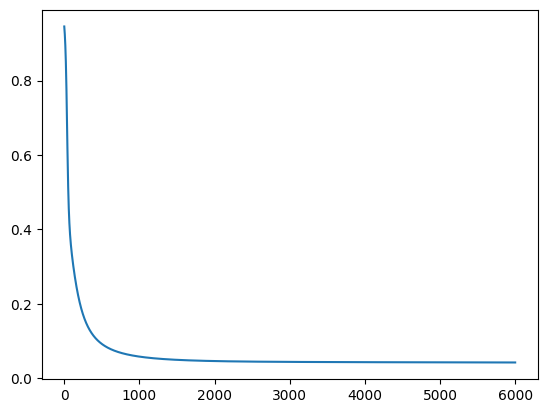

In [ ]:
def sigmoid(x):
    return scipy.special.expit(x)

te=100
ti=10
tf=1

a=0.1
En=np.zeros((te,1))
En[0]=1
En[1]=1
En2=np.zeros((te,1))
En2[5]=1
En2[6]=1

O=np.ones((tf,1))
O2=np.zeros((tf,1))

w1=np.random.rand(ti,te)
w2=np.random.rand(tf,ti)

#Retroalimentación negativa para que las neuronas no se saturen
#Si se tuviera más capas debería de tenerse mas lambdas
lamb=0.001
def entrena(w1, w2, En, O):
    Si = sigmoid(np.dot(w1, En))
    S = sigmoid(np.dot(w2, Si))
    e = O - S
    ei = np.dot(w2.T, e)
    w2 += a*(np.dot(e*S*(1.-S), Si.T) - lamb * w2)
    w1 += a*(np.dot(ei*Si*(1.-Si), En.T) - lamb * w1)
    return w1, w2, np.mean(e)

def clasifica(w1,w2,En):
  Si=sigmoid(np.dot(w1,En))
  S=sigmoid(np.dot(w2,Si))
  return S

lis_error=[]
for i in range(0,6000):
  w1,w2,error=entrena(w1,w2,En,O)
  w1,w2,error=entrena(w1,w2,En2,O2)
  lis_error.append(abs(error))

print(clasifica(w1,w2,En))
print(clasifica(w1,w2,En2))

plt.plot(lis_error)

In [ ]:
from PIL import Image
from numpy.linalg import inv
import scipy.special
from numpy import *
import numpy as np

def convert(nombre):
  f = Image.open(nombre)
  new_img = f.resize((30,30))
  rgb_im = new_img.convert('RGB')
  width, height = rgb_im.size
  im = rgb_im
  grises = []

  for x in range(0, width):
    for y in range(0, height):
      r, g, b = rgb_im.getpixel((x, y))
      gris = int(float(r+g+b)/3.0)
      if(gris < 105):
        p = 0
      else:
        p = 1
      grises.append(p)
  tam = len(grises)
  patron = np.array(zeros((tam, 1), float))
  for i in range(0, tam):
    patron[i, 0] = float(grises[i])
  return patron

<PIL.Image.Image image mode=RGB size=30x30 at 0x7F45D42A1A20>
<PIL.Image.Image image mode=RGB size=30x30 at 0x7F45D42A28F0>
<PIL.Image.Image image mode=RGB size=30x30 at 0x7F45D42A19C0>
<PIL.Image.Image image mode=RGB size=30x30 at 0x7F45D42A1BD0>
<PIL.Image.Image image mode=RGB size=30x30 at 0x7F45D42A19F0>
<PIL.Image.Image image mode=RGB size=30x30 at 0x7F45D42A1A50>
<PIL.Image.Image image mode=RGB size=30x30 at 0x7F45D42A1A20>
<PIL.Image.Image image mode=RGB size=30x30 at 0x7F45D42A28F0>
[[0.68383253]]
[[0.66659613]]


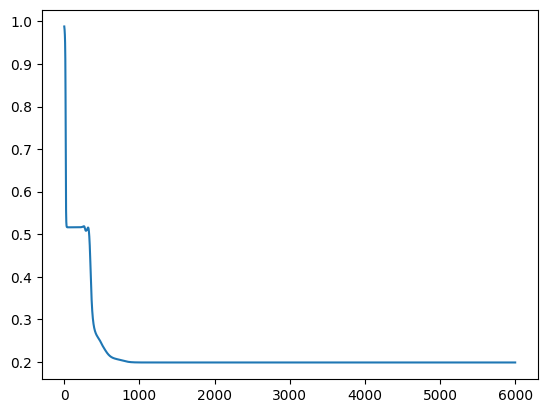

In [ ]:
uno=convert('/content/uno1.png')
uno_=convert('/content/uno2.png')
cero=convert('/content/cero1.png')
cero_=convert('/content/cero2.png')
unoprueba=convert('/content/unoprueba.png')
ceroprueba=convert('/content/ceroprueba.png')
sieteprueba=convert('/content/sieteprueba.png')
ochoprueba=convert('/content/ochoprueba.png')

def sigmoid(x):
    return scipy.special.expit(x)

a=0.1
te=900
ti=10
tf=1

O=np.ones((tf,1))
O2=np.zeros((tf,1))

#O= np.array (np.mat ('0.0 ; 1.0'))
#O2= np.array(np.mat('1.0 ; 0.0'))

w1=np.random.rand(ti,te)
w2=np.random.rand(tf,ti)

#Retroalimentación negativa para que las neuronas no se saturen
#Si se tuviera más capas debería de tenerse mas lambdas
lamb=0.03
def entrena(w1, w2, En, O):
    Si = sigmoid(np.dot(w1, En))
    S = sigmoid(np.dot(w2, Si))
    e = O - S
    ei = np.dot(w2.T, e)
    w2 += a*(np.dot(e*S*(1.-S), Si.T) - lamb * w2)
    w1 += a*(np.dot(ei*Si*(1.-Si), En.T) - lamb * w1)
    return w1, w2, np.mean(e)

def clasifica(w1,w2,En):
  Si=sigmoid(np.dot(w1,En))
  S=sigmoid(np.dot(w2,Si))
  return S

lis_error=[]
for i in range(0,6000):
  w1,w2,error=entrena(w1,w2,uno,O)
  w1,w2,error=entrena(w1,w2,cero,O2)
  w1,w2,error=entrena(w1,w2,uno_,O)
  w1,w2,error=entrena(w1,w2,cero_,O2)
  lis_error.append(abs(error))

print(clasifica(w1,w2,unoprueba))
print(clasifica(w1,w2,ceroprueba))
print(clasifica(w1,w2,sieteprueba))
print(clasifica(w1,w2,ochoprueba))

plt.plot(lis_error)
